# Women in Stack Overflow

Stack Overflow (SO) is a well-known website for all things related to code. Whether you're a newbie or a seasoned developer, chances are you've spent some quality time scrambling around people's Q&As for insight on how to unstuck you on your code.

In [their words](https://stackoverflow.com/company):
>Founded in 2008, Stack Overflow is the largest, most trusted online community for anyone that codes to learn, share their knowledge, and build their careers. **More than 50 million unique visitors** come to Stack Overflow **each month** to help solve coding problems, develop new skills, and find job opportunities.

Another great thing about SO is the [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey). Every year since 2011, they open the survey to anyone willing to commit their time to it.
In addition to SO's insights, this data collected makes it possible for anyone else to get ideas about the community, its members and people that contribute to the website.

After a little while of constantly visiting SO as I was learning new languages, features, ways to visualize data, I started wondering about women involved with tech. The data collected by the Annual Developer Survey from 2019 is a good start to get some insights.  
The next notebook comprises some analysis about
 - [Gender](#Gender)  
 - [Employment](#Employment)  
 - [Work as Developers](#Work-as-Developers)  
 - [Formal Education](#Formal-Education)  
 - [Country](#Country)  
 - [Ethnicity](#Ethnicity)  
 - [Age vs. Social Media](#Age-vs.-Social-Media)
 - [Women vs. Stack Overflow](#Women-vs.-Stack-Overflow)
 
The survey and questions asked are available in this [pdf](data/so_survey_2019.pdf).

### Import libraries and helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from helpers import search_question, get_probs, plot_stats
%matplotlib inline

### Import and show the data

Read the data and schema of the survey, store them in variables and show the first five rows.

In [2]:
df = pd.read_csv('./data/survey_results_public.csv')
schema = pd.read_csv('./data/survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


Every row represents a participant's answers.
Every column represents a question asked.

In [3]:
participants, questions = df.shape
notes = []
notes.append('The survey had {} participants.'.format(participants))

As I was analyzing the data, I found it useful to store my notes in a variable to retrieve it at the end.
With this I'd avoid to make a mess of the notebook, and also having to come back to every note alongside it.

My notes had the next structure:
```python
notes = []
notes.append('string to format'.format(
    value_1,
    value_2,
    value_3,
))
```   

*String to format* was the context where to place the data.  
*Values_\** came from the analysis of the data.  
The result was the note: instead of hardcorded results, I'd added context and let the data speak for itself.

## Gender

I wrote the function **search_question** that will search the schema for a given term and retrieve all the questions that match it.
This facilitates the task of retrieving columns to analyze them.

In [4]:
print(search_question.__doc__)


    Parameters:
        schema (pandas.core.frame.DataFrame): dataframe containing two columns
            'Column' - strings corresponding with the column names from the main dataframe
            'QuestionText' - strings corresponding to the question asked on the survey
        search_term (str): term to search to retrieve index and text
        
    Returns:
        questions (list): list of dictionaries, where each dictionary corresponds to a distinct question has three keys
                            * id (int): index
                            * colname (str): column name
                            * question (str): text from the question found.
    


In [5]:
search_question(schema, "identify")

[{'id': 78,
  'colname': 'Gender',
  'question': 'Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.'},
 {'id': 79, 'colname': 'Trans', 'question': 'Do you identify as transgender?'},
 {'id': 80,
  'colname': 'Sexuality',
  'question': 'Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.'},
 {'id': 81,
  'colname': 'Ethnicity',
  'question': 'Which of the following do you identify as? Please check all that apply. If you prefer not to answer, you may leave this question blank.'}]

What are the unique values for the question about *Gender* ?

In [6]:
df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

Taking a look to the values, we can easily identify:  
 - Man
 - Woman
 - Non-binary, genderqueer, or gender non-conforming
 
Those values repeated alone and in combinations, and the survey format makes it obvious that the first value in combinations was the first marked by the respondant.  
I imputed and transformed the values as follows:
 - transform *Woman;Man* values to *Non-binary*
 - keep the first value in combinations
 - transform *Non-binary, genderqueer, or gender non-conforming* to *Non-binary*

In [7]:
gender_dict = {
    'replace': ['Woman;Man', '.+;', 'Non-binary, genderqueer, or gender non-conforming'],
    'value': ['Non-binary', '', 'Non-binary']
}

df['Gender'].replace(to_replace=gender_dict['replace'], value=gender_dict['value'], regex=True, inplace=True)

I wrote the helper function **get_probs** that will compute the percentages of values in a pandas Series.  
Then again, avoided the clutter in the notebook.

In [8]:
print(get_probs.__doc__)


    Takes in a column with numeric values and returns the percentage of unique values in the dataset.
    
    Parameters:
        pd_serie (pandas.core.series.Series): pandas Series
        
    Returns:
        pandas.core.series.Series with percentages of the unique values in the original data input.
        
    


In [9]:
stats_gender = get_probs(df['Gender'])
stats_gender

Man           91.233637
Woman          7.428050
Non-binary     1.338313
Name: Gender, dtype: float64

The **plot_stats** helper function takes in a pandas Series and plots it.

In [10]:
print(plot_stats.__doc__)


    Plots a bar graph out of pandas Series values (index, values).
    
    Parameters:
        x: labels
        y: values
        
        Optional values
            title (str): graph title - default 'Title'
            xlabel_ (str): label for the X axis - default 'X labels'
            ylabel_ (str): label for the Y axis - default 'Y labels'
            xticks_labels (list): change the X labels for the given list of labels - default None
            color (tuple): default (0.1, 0.2, 0.5, 0.7)
            filename (str): name and extension of the file to save the graph - default None
        
    Returns:
        bar graph with the specified characteristics
    


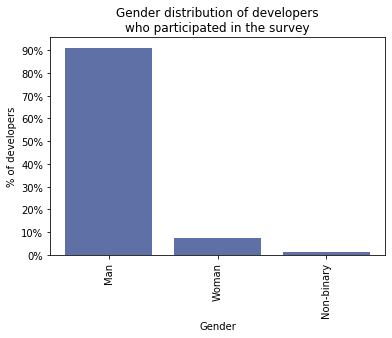

In [11]:
plot_stats(stats_gender.index, stats_gender.values, title='Gender distribution of developers\nwho participated in the survey', 
           xlabel_='Gender', ylabel_='% of developers', filename='img/Gender.png')

In [12]:
notes.append('Approximately {}% of the participants were men, {}% were women, and {}% as non-binary, genderqueer, or gender non-conforming.'.format(
    round(stats_gender.Man, 1),
    round(stats_gender.Woman, 1),
    round(stats_gender['Non-binary'], 1),
))

The desirable subject of this analysis are participants of the survey whose gender identity (or one of them) was woman.  
I reflected this as a subset of only woman participants from the imputed data and stored it in a variable ***df_woman***.

In [13]:
df['Gender'].isnull().sum()

3477

In [14]:
gender_woman = ['Woman']
df_woman = df[df['Gender'].isin(gender_woman)]

In [15]:
notes.append('The survey had {} of {} participants \
that identified themselves as women ({}%), and {} ({}%) that didn\'t provide information.'.format(df_woman.shape[0], 
                                                   df.shape[0], 
                                                   round(df_woman.shape[0] / df.shape[0] * 100, 1),
                                                   df['Gender'].isnull().sum(), 
                                                   round(df['Gender'].isnull().sum() / df.shape[0] * 100, 1)))

## Employment

Where there any questions about employment?

In [16]:
search_question(schema, "employment")

[{'id': 5,
  'colname': 'Employment',
  'question': 'Which of the following best describes your current employment status?'}]

In [17]:
df_woman['Employment'].unique()

array(['Employed part-time', 'Not employed, and not looking for work',
       'Employed full-time', 'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed', nan,
       'Retired'], dtype=object)

In [18]:
stats_work = get_probs(df_woman['Employment'])
stats_work

Employed full-time                                      73.828626
Not employed, but looking for work                       8.279846
Employed part-time                                       6.723363
Independent contractor, freelancer, or self-employed     6.675225
Not employed, and not looking for work                   4.139923
Retired                                                  0.353017
Name: Employment, dtype: float64

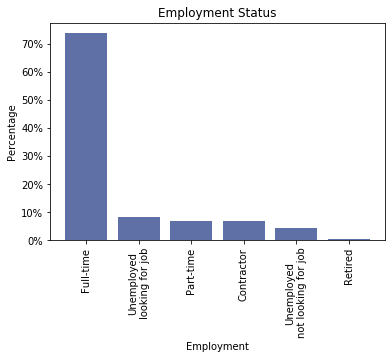

In [19]:
plot_stats(stats_work.index, stats_work.values, title='Employment Status', 
           xlabel_='Employment', ylabel_='Percentage', filename='img/Employment.png', 
           xticks_labels=['Full-time', 'Unemployed\nlooking for job', 'Part-time', 'Contractor', 'Unemployed\nnot looking for job', 'Retired'])

In [20]:
df_woman['Employment'].isnull().sum()

112

In [21]:
work_vals = [df_woman.shape[0], df_woman['Employment'].isnull().sum()]

for i in range(3):
    work_vals.append(round(stats_work[i], 1))
    work_vals.append(stats_work.index[i].lower())

notes.append('From the {} women developers, {} didn\'t \
provide information on this question, and \
approximately {}% were {}, {}% were {}, and {}% were {}.'.format(*work_vals))

I filtered the ***df_woman*** data to take some notes about women employed at the time of the survey. For this purpose, I stored it in ***df_woman_working*** variable.  

Then I stored it back in ***df_woman*** to use it in the rest of the notebook.

In [22]:
working_targets = ['Employed full-time',
                   'Independent contractor, freelancer, or self-employed',
                   'Employed part-time']

df_woman_working = df_woman[df_woman['Employment'].isin(working_targets)]

In [23]:
women_work_ = '{} out of {} women developers ({}% of them) were actively working at the moment of participating in the survey.'
notes.append(women_work_.format(df_woman_working.shape[0], 
                   df_woman.shape[0], 
                   round(df_woman_working.shape[0] / df_woman.shape[0] * 100, 1)))

In [24]:
df_woman = df_woman_working

## Work as Developers

I also wanted to know if the women participants were developers.  
The first step to find out was to get all questions related to code:

In [25]:
search_question(schema, 'code')

[{'id': 1,
  'colname': 'MainBranch',
  'question': 'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'},
 {'id': 2, 'colname': 'Hobbyist', 'question': 'Do you code as a hobby?'},
 {'id': 14,
  'colname': 'Age1stCode',
  'question': 'At what age did you write your first line of code or program? (E.g., webpage, Hello World, Scratch project)'},
 {'id': 15,
  'colname': 'YearsCodePro',
  'question': 'How many years have you coded professionally (as a part of your work)?'},
 {'id': 38,
  'colname': 'CodeRev',
  'question': 'Do you review code as part of your work?'},
 {'id': 39,
  'colname': 'CodeRevHrs',
  'question': 'On average, how many hours per week do you spend on code review?'}]

*MainBranch* looks promising. According to the survey, you could only provide one answer for this, so no need to impute or transform the answers.  
Let's see the unique values for this question:

In [26]:
df_woman['MainBranch'].unique()

array(['I am a student who is learning to code',
       'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I used to be a developer by profession, but no longer am',
       'I code primarily as a hobby', nan], dtype=object)

In [27]:
stats_dev = get_probs(df_woman['MainBranch'])
stats_dev

I am a developer by profession                                                   78.004073
I am not primarily a developer, but I write code sometimes as part of my work    11.757082
I am a student who is learning to code                                            6.702463
I used to be a developer by profession, but no longer am                          1.944084
I code primarily as a hobby                                                       1.592298
Name: MainBranch, dtype: float64

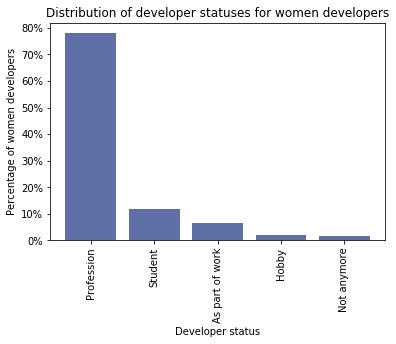

In [28]:
plot_stats(stats_dev.index, stats_dev.values, title='Distribution of developer statuses for women developers', 
           xlabel_='Developer status', ylabel_='Percentage of women developers', filename='img/Devs.png', 
           xticks_labels=['Profession', 'Student', 'As part of work', 'Hobby', 'Not anymore'])

In [29]:
df_woman['MainBranch'].isnull().sum()

35

In [30]:
branch_vals = [df_woman.shape[0],
               df['MainBranch'].isnull().sum(),
               (df_woman.shape[0] - df['MainBranch'].isnull().sum())]

for i in range(3):
    branch_vals.append(round(stats_dev[i], 1))
    branch_vals.append(stats_dev.index[i])

main_branch_ = 'From the {} women developers participating in the survey, {} didn\'t provide information on this question. From the {} who did answered, approximately {}% answered "{}", {}% said "{}", and {}% answered "{}".'
notes.append(main_branch_.format(*branch_vals))

In the previous section, I filtered all the data from women to keep only those employed at the time of the survey.   
Now, I filter those who work as developers.

In [31]:
branch_targets = ['I am a developer by profession', 
                  'I am not primarily a developer, but I write code sometimes as part of my work']

df_woman = df_woman[df_woman['MainBranch'].isin(branch_targets)]

## Formal Education

I aim to get only information about formal education, and unique values for this question.  
Same as previous sections, I use the helper functions to:
 - get questions related to the education level and unique values,
 - get percentages for this data,
 - plot the percentages,
 - take a note about this information

In [32]:
search_question(schema, "education")

[{'id': 8,
  'colname': 'EdLevel',
  'question': 'Which of the following best describes the highest level of formal education that you’ve completed?'},
 {'id': 10,
  'colname': 'EduOther',
  'question': 'Which of the following types of non-degree education have you used or participated in? Please select all that apply.'},
 {'id': 13,
  'colname': 'YearsCode',
  'question': 'Including any education, how many years have you been coding?'}]

In [33]:
df_woman['EdLevel'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree', nan, 'Professional degree (JD, MD, etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [34]:
stats_ed = get_probs(df_woman['EdLevel'])
stats_ed

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              54.366079
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           27.204030
Some college/university study without earning a degree                                 7.640638
Other doctoral degree (Ph.D, Ed.D., etc.)                                              3.316541
Associate degree                                                                       2.959698
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2.686818
Professional degree (JD, MD, etc.)                                                     1.175483
I never completed any formal education                                                 0.440806
Primary/elementary school                                                              0.209908
Name: EdLevel, dtype: float64

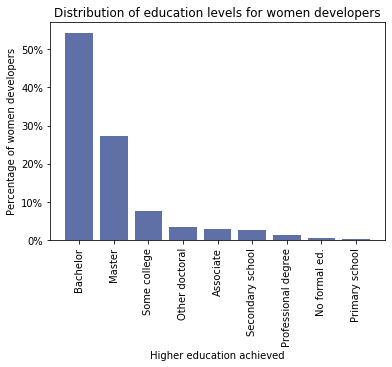

In [35]:
plot_stats(stats_ed.index, stats_ed.values, title='Distribution of education levels for women developers', 
           xlabel_='Higher education achieved', ylabel_='Percentage of women developers', filename='img/EdLevel.png', 
           xticks_labels=['Bachelor', 'Master', 'Some college', 'Other doctoral', 'Associate', 
                          'Secondary school', 'Professional degree', 'No formal ed.', 'Primary school'])

In [36]:
df_woman['EdLevel'].isnull().sum()

84

In [37]:
ed_vals = [df_woman.shape[0], df_woman['EdLevel'].isnull().sum()]

for i in range(3):
    ed_vals.append(round(stats_ed[i], 1))
    ed_vals.append(stats_ed.index[i])

notes.append('From the {} women developers, {} didn\'t provide information on this question, \
approximately {}% had a {}, {}% a {}, and {}% had {}.'.format(*ed_vals))

## Country

In [38]:
search_question(schema, "country")

[{'id': 6,
  'colname': 'Country',
  'question': 'In which country do you currently reside?'}]

In [39]:
df_woman['Country'].unique()[:10]

array(['United States', 'Philippines', 'India', 'China', 'Canada',
       'Croatia', 'Iran', 'Austria', 'Argentina', 'Russian Federation'],
      dtype=object)

In [40]:
stats_country = get_probs(df_woman['Country'])
stats_country

United States     34.756601
India              8.622112
United Kingdom     7.322607
Canada             4.847360
Germany            4.744224
                    ...    
Costa Rica         0.020627
Bahamas            0.020627
Cambodia           0.020627
Afghanistan        0.020627
Guatemala          0.020627
Name: Country, Length: 115, dtype: float64

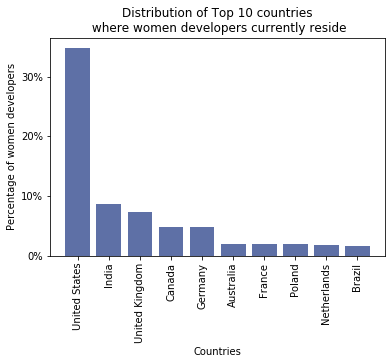

In [41]:
plot_stats(stats_country.index[:10], stats_country.values[:10], title='Distribution of Top 10 countries\n where women developers currently reside', 
           xlabel_='Countries', ylabel_='Percentage of women developers', filename='img/Country.png')

In [42]:
df_woman['Country'].isnull().sum()

0

In [43]:
country_vals = [df_woman.shape[0], 
                df_woman['Country'].isnull().sum()]

for i in range(5):
    country_vals.append(stats_country.index[i])
    country_vals.append(round(stats_country[i], 1))
    
about_countries = 'The {} actively working women developers that participated in the survey\
and gave some kind of information ({} didn\'t provide information about \
their residence) about their education were predominantly from {} ({}%),\
{} ({}%), {} ({}%), {} ({}%), and {} ({}%).'
notes.append(about_countries.format(*country_vals))

## Ethnicity

In [44]:
search_question(schema, "identify")

[{'id': 78,
  'colname': 'Gender',
  'question': 'Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.'},
 {'id': 79, 'colname': 'Trans', 'question': 'Do you identify as transgender?'},
 {'id': 80,
  'colname': 'Sexuality',
  'question': 'Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.'},
 {'id': 81,
  'colname': 'Ethnicity',
  'question': 'Which of the following do you identify as? Please check all that apply. If you prefer not to answer, you may leave this question blank.'}]

For this question, was possible to mark more than one answer, even though there were options like *Biracial* and *Multiracial*.  
We can see in the next cell some of the unique answers:

In [45]:
df_woman['Ethnicity'].unique()[:10]

array(['Black or of African descent', 'East Asian;South Asian', nan,
       'White or of European descent', 'Middle Eastern',
       'Hispanic or Latino/Latina', 'East Asian',
       'Black or of African descent;White or of European descent;Biracial',
       'Hispanic or Latino/Latina;White or of European descent',
       'South Asian'], dtype=object)

In [46]:
df_woman['Ethnicity'].isnull().sum()

504

In [47]:
len(df_woman['Ethnicity'].unique())

67

There were 67 unique combinations for the question about *Ethnicity*.  
My approach was to simplify the information for the solely purpose of getting a better idea about ethnicities.  
I imputed the answers and keep only the first answer of each respondant.  
Then I got the percentages of distinct ethnicities for women developers employed at the time of the survey.

In [48]:
ethnics = df_woman[['Ethnicity', 'Country']].copy().dropna()
ethnics['Ethnicity'].replace(to_replace=';.+', value='', regex=True, inplace=True)

In [49]:
stats_ethnic = get_probs(ethnics['Ethnicity'])
stats_ethnic

White or of European descent                                   67.219153
South Asian                                                     8.310313
East Asian                                                      7.090239
Hispanic or Latino/Latina                                       6.445672
Black or of African descent                                     4.719153
Middle Eastern                                                  3.890424
Multiracial                                                     0.828729
Biracial                                                        0.828729
Native American, Pacific Islander, or Indigenous Australian     0.667587
Name: Ethnicity, dtype: float64

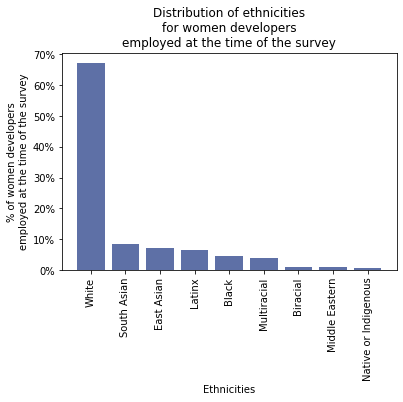

In [50]:
plot_stats(stats_ethnic.index, stats_ethnic.values, 
           title='Distribution of ethnicities\nfor women developers\nemployed at the time of the survey',
           ylabel_='% of women developers\nemployed at the time of the survey', 
           xlabel_='Ethnicities', 
           xticks_labels=['White', 'South Asian', 'East Asian', 'Latinx', 'Black', 'Multiracial', 'Biracial',
                          'Middle Eastern', 
                          'Native or Indigenous'],
           filename='img/Distribution_Ethnics.png')

The plot give us an idea of the ethnicities of the participants.  
But ethnicity makes sense in a context of where the participant is located.  
To compel with this idea, I:
 - took the countries where the women developer where currently located, 
 - created a dummy variable out of the *Ethnicity* column,
 - filtered the first 10 countries where the participants where located,
 - grouped by *Country*,
 - computed the percentages for Country-Ethnicity values  
 
After all this, I plotted the matrix as a heatmap and provided the percentages to assist the comparison between ethnicities in these countries.

In [51]:
ethnics_top_countries = pd.concat([ethnics['Country'], pd.get_dummies(ethnics['Ethnicity'], drop_first=True)], axis=1)
ethnics_top_countries = ethnics_top_countries[ethnics.Country.isin(stats_country.index[:10])].groupby('Country').mean() * 100
ethnics_top_countries

,Black or of African descent,East Asian,Hispanic or Latino/Latina,Middle Eastern,Multiracial,"Native American, Pacific Islander, or Indigenous Australian",South Asian,White or of European descent
Country,,,,,,,,
Australia,0.000000,15.909091,2.272727,3.409091,0.000000,2.272727,3.409091,71.590909
Brazil,13.043478,4.347826,40.579710,0.000000,4.347826,1.449275,0.000000,31.884058
Canada,2.314815,10.648148,5.555556,2.314815,2.314815,1.388889,6.944444,66.203704
France,8.333333,4.761905,2.380952,2.380952,2.380952,0.000000,1.190476,75.000000
Germany,1.369863,3.196347,2.739726,3.196347,0.456621,0.000000,4.109589,83.105023
India,0.485437,11.650485,0.000000,0.970874,0.485437,0.485437,85.922330,0.000000
Netherlands,2.666667,1.333333,6.666667,2.666667,1.333333,0.000000,5.333333,80.000000
Poland,0.000000,0.000000,0.000000,1.123596,0.000000,0.000000,0.000000,98.876404
United Kingdom,4.941860,1.744186,1.162791,1.744186,2.034884,0.290698,3.488372,83.720930


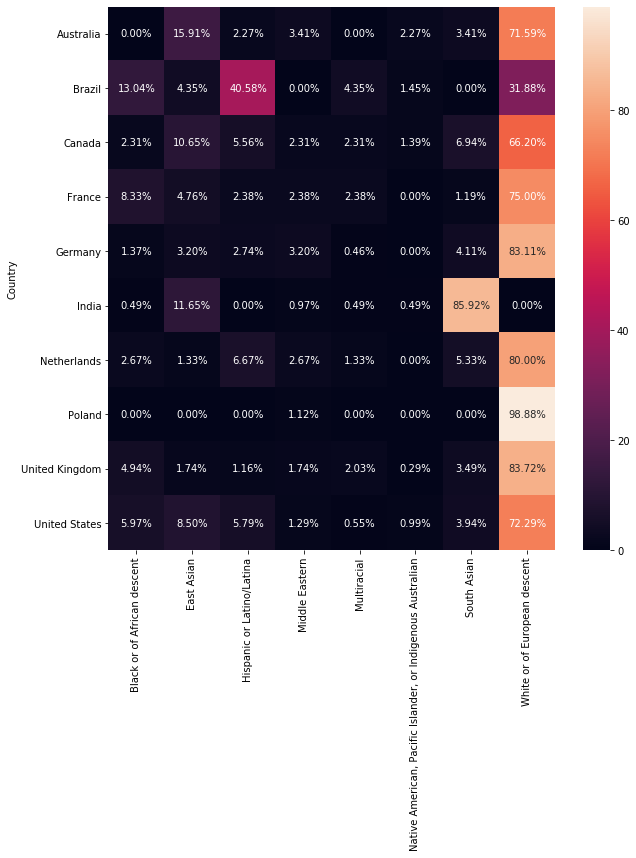

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(ethnics_top_countries, annot=True, fmt=".2f")
for t in ax.texts: 
    t.set_text(t.get_text() + "%")
plt.autoscale()
plt.savefig('img/Ethnicity.png', bbox_inches = "tight");

As we can see in the heatmap, each country was paired with the % of women developers currently located there and their ethnicity.  
I kept each *Ethnicity* label as it was.

In [53]:
ethnic_vals = [df_woman.shape[0] - df_woman['Ethnicity'].isnull().sum()]

for i in range(5):
    ethnic_vals.append(stats_ethnic.index[i])
    ethnic_vals.append(round(stats_ethnic[i], 1))

ethnic_vals.append(df_woman['Ethnicity'].isnull().sum())
    
about_ethnics = 'The {} actively working women developers that participated in the survey, \
gave information about their education and ethnicity were predominantly {}s ({}%), \
{} ({}%), {} ({}%), {} ({}%), and {}s ({}%). {} didn\'t provide information.'
notes.append(about_ethnics.format(*ethnic_vals))

## Age vs. Social Media

Out of my curiosity I wondered where could I find women developers to connect with them. I've found many on Twitter (say [hi](https://twitter.com/miss_sizigia)!).  
But, what are other choices and would this have something to do with their age?

In [54]:
search_question(schema, "social")

[{'id': 61,
  'colname': 'SocialMedia',
  'question': 'What social media site do you use the most?'}]

In [55]:
df_woman[['Age', 'SocialMedia']].isnull().sum().sum()

626

I filtered women by *Age* and *SocialMedia*, dropped NaN values, and got the unique values for *SocialMedia*.

In [56]:
woman_age_socialmedia = df_woman[['Age', 'SocialMedia']].dropna()

woman_age_socialmedia['SocialMedia'].unique()

array(['Instagram', 'Facebook', 'YouTube', 'WeChat 微信', 'Twitter',
       'WhatsApp', 'VK ВКонта́кте', 'Reddit', 'LinkedIn',
       "I don't use social media", 'Snapchat', 'Weibo 新浪微博'], dtype=object)

As we can see, *VK ВКонта́кте*, *WeChat 微信* and *Weibo 新浪微博* have characters from other alphabets, so I cleaned the names for readability.

In [57]:
socialmedia_dict = {
    'replace': ["I don't use social media", '(?![a-zA-Z]).+'], 
    'value': ['None', '']
}

woman_age_socialmedia['SocialMedia'].replace(to_replace=socialmedia_dict['replace'], 
                                             value=socialmedia_dict['value'], 
                                             regex=True, inplace=True)

Next, I:
 - created a dummy variable out of *SocialMedia*,
 - cut the DataFrame to have ranges of age instead of individual ages of each participants and stored it as *AgeRange*,
 - dropped the *Age* column,
 - grouped by *AgeRange*, 
 - computed the mean percentages, and
 - stored it all in a **age_social_media**:

In [58]:
woman_age_socialmedia = pd.concat([woman_age_socialmedia['Age'], pd.get_dummies(woman_age_socialmedia['SocialMedia'], drop_first=True)], axis=1)

bins = [0, 18, 25, 32, 39, 46, 53, np.inf]
names = ['<18', '18-25', '25-32', '32-39', '39-46', '46-53', '53+']

woman_age_socialmedia['AgeRange'] = pd.cut(woman_age_socialmedia.Age, bins, labels=names)

woman_age_socialmedia.drop(columns='Age', inplace=True)

age_social_media = woman_age_socialmedia.groupby('AgeRange').mean() * 100

Next, I create a dictionary to map the categorical ranges with strings to give them meaning later on when I take a note about this analysis.

In [59]:
age_social_dict = {}
strs = ['younger than 18', 
'between 18 and 25',
'between 25 and 32',
'between 32 and 39',
'between 39 and 46',
'between 46 and 53',
'older than 53']

for idx, name in enumerate(names):
    age_social_dict[name] = strs[idx]

age_social_dict

{'<18': 'younger than 18',
 '18-25': 'between 18 and 25',
 '25-32': 'between 25 and 32',
 '32-39': 'between 32 and 39',
 '39-46': 'between 39 and 46',
 '46-53': 'between 46 and 53',
 '53+': 'older than 53'}

The following DataFrame shows the percentages of women developers employed at the time of the survey grouped by age ranges of:
 - younger than 18 (<18),
 - between 18 and 25 (18-25],
 - between 25 and 32 (25-32],
 - between 32 and 39 (32-39],
 - between 39 and 46 (39-46],
 - between 46 and 53 (46-53],
 - older than 53 (53+)

In [60]:
age_social_media

,Instagram,LinkedIn,None,Reddit,Snapchat,Twitter,VK,WeChat,Weibo,WhatsApp,YouTube
AgeRange,,,,,,,,,,,
<18,11.111111,0.000000,0.000000,27.777778,0.000000,16.666667,0.000000,0.000000,0.000000,5.555556,38.888889
18-25,19.150708,3.330558,2.497918,12.905912,1.248959,12.572856,0.999167,0.999167,0.166528,15.736886,12.739384
25-32,20.925229,3.926842,2.366864,12.103281,0.753093,17.590102,0.537924,0.537924,0.000000,14.954276,8.337816
32-39,12.247839,4.610951,3.890490,8.357349,0.000000,24.639769,0.576369,0.576369,0.000000,12.391931,7.636888
39-46,6.959707,6.959707,4.395604,4.029304,0.000000,34.065934,0.366300,0.000000,0.366300,9.890110,5.128205
46-53,4.964539,5.673759,5.673759,3.546099,0.000000,31.205674,0.000000,0.000000,0.000000,6.382979,6.382979
53+,1.754386,8.771930,12.280702,3.508772,0.000000,29.824561,0.000000,0.000000,0.000000,14.035088,3.508772


Even though it is informative on its own, it doesn't say much since I have to search back and forth to get the maximum values.  
I can quickly solve this by creating a new DataFrame with the maximum values per index and the associated percentage.  
I transposed both columns to have all values of *AgeRange* as columns and both *Most Used Site* and *% of users* as indexes.

In [61]:
most_used_media = pd.DataFrame([age_social_media.T.idxmax(), round(age_social_media.T.max(), 2)], 
                               index=['Most Used Site', '% of users'])
most_used_media

AgeRange,<18,18-25,25-32,32-39,39-46,46-53,53+
Most Used Site,YouTube,Instagram,Instagram,Twitter,Twitter,Twitter,Twitter
% of users,38.89,19.15,20.93,24.64,34.07,31.21,29.82


I extract another note from this data wrangling using the dictionary I previously created and another list to store significant data.

In [62]:
age_social_vals = [search_question(schema, "social")[0]['question'].lower(), 
                   df_woman.shape[0], 
                   df_woman[['Age', 'SocialMedia']].isnull().sum().sum(),
                   woman_age_socialmedia.shape[0]]

for col in most_used_media.columns:
    age_social_vals.append(int(woman_age_socialmedia.shape[0] * most_used_media[col]['% of users'] / 100))
    age_social_vals.append(age_social_dict[col])
    age_social_vals.append(most_used_media[col]['Most Used Site'])
    age_social_vals.append(most_used_media[col]['% of users'])

notes.append('When asked "{}" to {} women developers, {} didn\'t provide one of/both their age and \
social media site of preference. From the {} who provided the information, \
\n - {} women, {} years old, said {} ({}%),\
\n - {} women, {} years old, said {} ({}%), \
\n - {} women, {} years old, said {} ({}%), \
\n - {} women, {} years old, said {} ({}%), \
\n - {} women, {} years old, said {} ({}%), \
\n - {} women, {} years old, said {} ({}%), \
\n - {} women, {} years old, site of choice was {} ({}%).'.format(*age_social_vals))

Next, I found useful to visualize the matrix of values with a heatmap as done with *Ethnicity*.

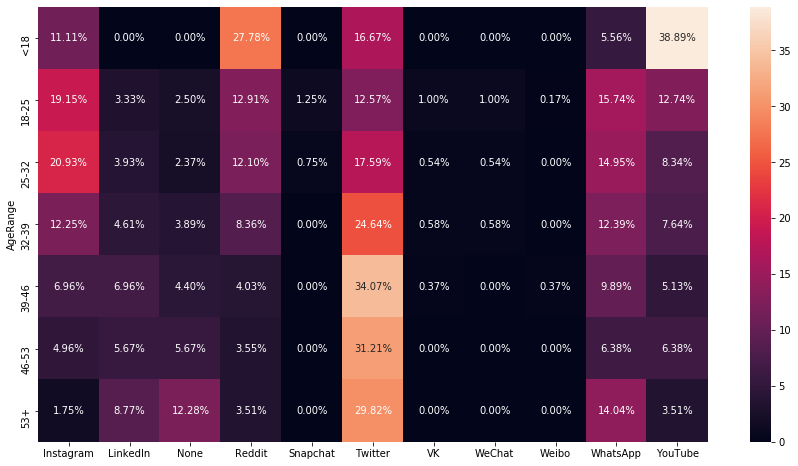

In [63]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(age_social_media, annot=True, fmt=".2f")
for t in ax.texts: 
    t.set_text(t.get_text() + "%")
plt.autoscale()
plt.savefig('img/SocialMedia.png', bbox_inches = "tight");

## Women vs. Stack Overflow

Last but not least, how do these actively working women developers interact with Stack Overflow?

First I need to know which columns are related with Stack Overflow in terms o questions, so:

In [64]:
search_question(schema, "Stack Overflow")

[{'id': 64,
  'colname': 'SOVisit1st',
  'question': 'To the best of your memory, when did you first visit Stack Overflow?'},
 {'id': 65,
  'colname': 'SOVisitFreq',
  'question': 'How frequently would you say you visit Stack Overflow?'},
 {'id': 66,
  'colname': 'SOVisitTo',
  'question': 'I visit Stack Overflow to... (check all that apply)'},
 {'id': 67,
  'colname': 'SOFindAnswer',
  'question': 'On average, how many times a week do you find (and use) an answer on Stack Overflow?'},
 {'id': 68,
  'colname': 'SOTimeSaved',
  'question': 'Think back to the last time you solved a coding problem using Stack Overflow, as well as the last time you solved a problem using a different resource. Which was faster?'},
 {'id': 70,
  'colname': 'SOAccount',
  'question': 'Do you have a Stack Overflow account?'},
 {'id': 71,
  'colname': 'SOPartFreq',
  'question': 'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on qu

Next, I'm going to copy a subset of questions from ***df_woman***.  
This prevents me from messing with the data I've been wrangling, and be sure I'll keep this new DataFrame separate from ***df_woman***.

In [65]:
stackoverflow = df_woman[['Age', 'MainBranch', 'Employment', 'YearsCodePro',
          'SOVisit1st', 'SOVisitFreq', 'SOVisitTo',
          'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime',
          'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
          'SOComm', 'WelcomeChange', 'SONewContent']].copy()

stackoverflow.head()

,Age,MainBranch,Employment,YearsCodePro,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent
34,35.0,I am a developer by profession,Employed full-time,14,2014,A few times per month or weekly,Find answers to specific questions,1-2 times per week,Stack Overflow was slightly faster,11-30 minutes,No,NaN,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Not sure,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...
70,21.0,I am a developer by profession,Employed full-time,Less than 1 year,2013,Daily or almost daily,Find answers to specific questions;Pass the ti...,3-5 times per week,They were about the same,NaN,Yes,A few times per week,Yes,"No, I've heard of them, but I am not part of a...","Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Tech...
74,27.0,I am a developer by profession,Employed full-time,7,2012,Daily or almost daily,Find answers to specific questions,Less than once per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Courses on technologies you're interested in
85,26.0,"I am not primarily a developer, but I write co...",Employed full-time,3,2016,Multiple times per day,Find answers to specific questions;Contribute ...,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat more welcome now than last year,Tech articles written by other developers;Indu...
99,39.0,I am a developer by profession,Employed full-time,20,2008,Daily or almost daily,Find answers to specific questions,3-5 times per week,Stack Overflow was much faster,0-10 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,NaN


How many women answered any of these questions?

In [66]:
stackoverflow.shape[0]

4848

How many women didn\'t answer some of these questions?

In [67]:
stackoverflow.isnull().sum().sum()

4946

Let's keep information from only those who answered all of the questions about Stack Overflow.

In [68]:
stackoverflow.dropna(how='any', inplace=True)
stackoverflow.shape[0]

1837

Now, I'd like to see if there's some relation between the first time they visited Stack Overflow (*SOVisit1st*), the years of coding professionally (*YearsCodePro*), and the frequency of participation in the community (*SOPartFreq*).

First, let's take a look at the unique values for *YearsCodePro* and *SOVisit1st*.

In [69]:
stackoverflow['YearsCodePro'].unique()

array(['7', '3', '9', '1', '2', '6', '5', 'Less than 1 year', '4', '10',
       '12', '19', '24', '22', '15', '21', '17', '26', '30', '8', '11',
       '13', '18', '20', '16', '32', '29', '14', '23', '25', '27', '31',
       '36', '37', '38'], dtype=object)

As we see in *YearsCodePro*, not all values can be converted to numbers.  
To represent ```"Less than 1 year"```, I'm going to impute it with a ```0```, since less than 12 months don't make a full year.

In [70]:
stackoverflow['SOVisit1st'].unique()

array(['2012', '2016', "I don't remember", '2013', '2015', '2010', '2014',
       '2011', '2017', '2009', '2008', '2018', '2019'], dtype=object)

Again in *SOVisit1st*, not all values can be converted to numbers.  
To represent ```"I don't remember"```, I'm going to impute it with ```2019```, when the survey was launched, based on the assumption that at least they visited SO to complete the survey.

I'm copying and imputing *YearsCodePro* in ***years_SO***. I also casted the values to ```integer``` to be able to perfom calculations with them in the next lines.  
  
Then I create the column *YearsSince1stVisitSO*, that stores how many years have passed between their first visit to SO and the year of the survey (2019).  
  
The next line is yet another column named *YearsCodePro+SO* that stores the differences between the years as professional developers and the years since the first visit to SO.  
  
Values for *YearsCodePro+SO* would be interpreted as follows:
 - negative: the developer has been *x* years working professionally without visiting SO  

- positive: the developer has been *x* years working professionally visiting SO  

In [71]:
# Copy, impute and store YearsCodePro in years_SO
years_SO = stackoverflow[['YearsCodePro']].replace("Less than 1 year", 0.5, regex=True).copy().astype(int)

# Impute SOVisit1st, compute the difference between the year of the survey, cast it as integer,
#and store it in years_SO as YearsSince1stVisitSO
years_SO['YearsSince1stVisitSO'] = 2019 - stackoverflow['SOVisit1st']\
.replace("I don't remember", 2019, regex=True).astype(int)

# Compute the difference between YearsSince1stVisitSO and YearsCodePro
years_SO['YearsCodePro+SO'] = years_SO['YearsSince1stVisitSO'] - years_SO['YearsCodePro']

years_SO.head()

,YearsCodePro,YearsSince1stVisitSO,YearsCodePro+SO
74,7,7,0
85,3,3,0
179,9,0,-9
185,1,6,5
221,2,4,2


We obtained the values as predicted before, but a better way to make sense of continuous data is by binning the data, same as did before for [Age vs. Social Media](#Age-vs.-Social-Media).

Let's take a better look at the bins we're going to generate next:

 - Devs with 12 or more years of professional experience before their first visit: **(-inf, -12.0]**
 - Devs with 1 to almost 12 years of professional experience before their first visit: **(-12.0, -1.0]**
 - Devs who visited SO for the first time around the same time they started to work as developers, **(-1.0, 0.0]**
 - Devs who visited SO for the first time around the time they started to work as developers and as far as 3 years before that moment, **(0.0, 3.0]**
 - Devs who visited SO for the first time around 3 years before they started to work as developers and as far as 5 years before that moment, **(3.0, 5.0]**
 - Devs who visited SO for the first time more than 5 years before they started to work a developers, **(5.0, inf]**
 


In [72]:
bins = [-np.inf, -12, -1, 0, 3, 5, np.inf]
names = ['12+ before SO', 
         '1-12 before SO', 
         'Work+SO same time', 
         '0 to 3 after SO', 
         '3-5 after SO',
         '5+ after SO']

years_SO['YearsCodePro+SO'] = pd.cut(years_SO['YearsCodePro+SO'], bins, labels=names)

years_SO.head()

,YearsCodePro,YearsSince1stVisitSO,YearsCodePro+SO
74,7,7,Work+SO same time
85,3,3,Work+SO same time
179,9,0,1-12 before SO
185,1,6,3-5 after SO
221,2,4,0 to 3 after SO


I'm going to create another dictionary to keep track of the meaning of each bin. The purpose is using them later to get notes on this analysis.

In [89]:
years_SO_dict = {}

strs = ['devs with 12 or more years of professional experience before their first visit',
        'devs with 1 to almost 12 years of professional experience before their first visit', 
        'devs who visited SO for the first time around the same time they started to work as developers', 
        'devs who visited SO for the first time around the time they started to work as developers and as far as 3 years before that moment', 
        'devs who visited SO for the first time around 3 years before they started to work as developers and as far as 5 years before that moment', 
        'devs who visited SO for the first time more than 5 years before they started to work a developers']

for idx, name in enumerate(names):
    years_SO_dict[name] = strs[idx]

years_SO_dict

{'12+ before SO': 'devs with 12 or more years of professional experience before their first visit',
 '1-12 before SO': 'devs with 1 to almost 12 years of professional experience before their first visit',
 'Work+SO same time': 'devs who visited SO for the first time around the same time they started to work as developers',
 '0 to 3 after SO': 'devs who visited SO for the first time around the time they started to work as developers and as far as 3 years before that moment',
 '3-5 after SO': 'devs who visited SO for the first time around 3 years before they started to work as developers and as far as 5 years before that moment',
 '5+ after SO': 'devs who visited SO for the first time more than 5 years before they started to work a developers'}

In the next cell, I take the following steps:
 - create a dummy DataFrame for the *SOPartFreq*, this will assign ```1``` if the category is present in the row or not, and ```0``` if not,
 - store it in ***dummy_years***,
 - group by *YearsCodePro+SO*, to have the values for each bin I previously created, and last
 - take the mean percentages of the values.

In [74]:
dummies_years = pd.concat([years_SO['YearsCodePro+SO'], 
                           pd.get_dummies(stackoverflow['SOPartFreq'])], 
                          axis=1)\
                .groupby('YearsCodePro+SO').mean() * 100

There's another thing that can help the visualization, the columns of ***dummy_years*** are actually ordinal variables.  
Let's represent this by re-indexing the DataFrame with the provided list where I reordered the columns from more to less frequent.

In [75]:
dummies_years = dummies_years.reindex(['Multiple times per day',
                       'Daily or almost daily',
                       'A few times per week',
                       'A few times per month or weekly',
                       'Less than once per month or monthly',
                       'I have never participated in Q&A on Stack Overflow'], axis=1)
dummies_years

,Multiple times per day,Daily or almost daily,A few times per week,A few times per month or weekly,Less than once per month or monthly,I have never participated in Q&A on Stack Overflow
YearsCodePro+SO,,,,,,
12+ before SO,1.869159,5.607477,4.672897,14.953271,44.859813,28.037383
1-12 before SO,2.997275,2.724796,7.901907,18.528610,41.416894,26.430518
Work+SO same time,5.527638,2.512563,5.025126,14.070352,39.195980,33.668342
0 to 3 after SO,2.749638,3.907381,6.801737,14.905933,37.337192,34.298119
3-5 after SO,2.906977,2.616279,4.651163,14.244186,42.441860,33.139535
5+ after SO,2.325581,2.325581,10.077519,10.852713,40.310078,34.108527


Another way to visualize these values:

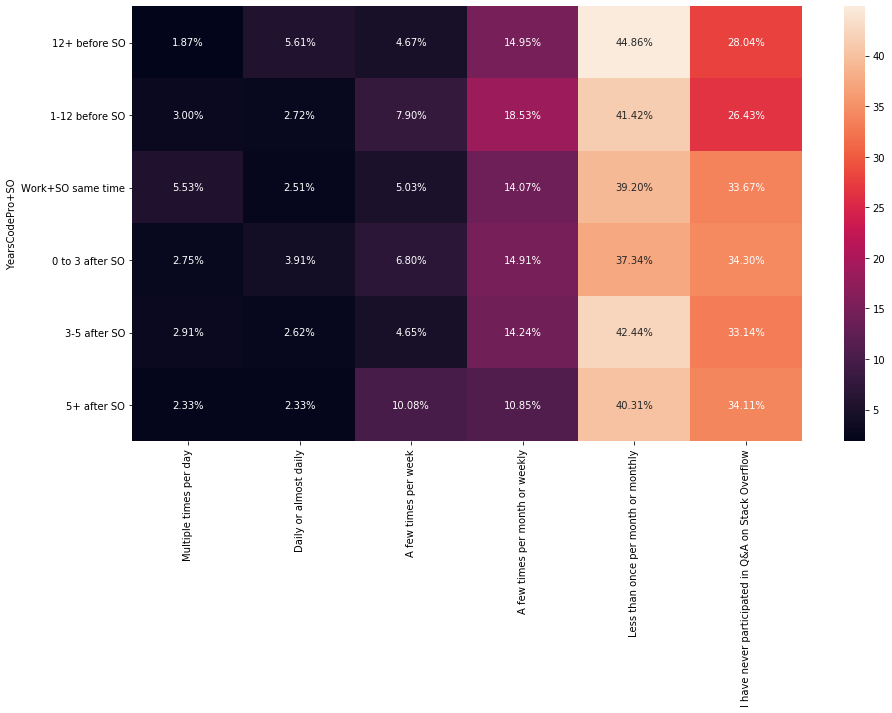

In [76]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(dummies_years, annot=True, fmt=".2f")
for t in ax.texts: 
    t.set_text(t.get_text() + "%")
plt.autoscale()
plt.savefig('img/YearsSOandPro.png', bbox_inches = "tight");

Great! Let's get the max frequencies for each group of developers:

In [77]:
years_SO_codePro = pd.DataFrame([dummies_years.T.idxmax(), round(dummies_years.T.max(), 2)], 
                               index=['Frequency of Participation', '% of users'])
years_SO_codePro

YearsCodePro+SO,12+ before SO,1-12 before SO,Work+SO same time,0 to 3 after SO,3-5 after SO,5+ after SO
Frequency of Participation,Less than once per month or monthly,Less than once per month or monthly,Less than once per month or monthly,Less than once per month or monthly,Less than once per month or monthly,Less than once per month or monthly
% of users,44.86,41.42,39.2,37.34,42.44,40.31


The probabilities highly suggest that actively working women developers, no matter how long they've been working as developers and have SO as a resource, visit the site less than once per month or monthly.

In [91]:
years_SO_vals = [stackoverflow.shape[0]]

for col in years_SO_codePro.columns:
    years_SO_vals.append(years_SO_codePro[col]['% of users'])
    years_SO_vals.append(years_SO_dict[col])
    years_SO_vals.append(years_SO_codePro[col]['Frequency of Participation'].lower())
    
notes.append('When asked about their participation in Stack Overflow, {} actively working \
women developers provided the following insights:\n\
 - {}% {}, said to visit SO {},\n\
 - {}% {}, said to visit SO {},\n\
 - {}% {}, said to visit SO {},\n\
 - {}% {}, said to visit SO {},\n\
 - {}% {}, said to visit SO {},\n\
 - {}% {}, said to visit SO {}.'.format(*years_SO_vals))

## Notes

Finally, let's print all my notes, save it in a file and proceed to use it to write an article or communicate the insights with my team, friends, family, or you!

In [94]:
print(*notes, sep='\n')

The survey had 88883 participants.
Approximately 91.2% of the participants were men, 7.4% were women, and 1.3% as non-binary, genderqueer, or gender non-conforming.
The survey had 6344 of 88883 participants that identified themselves as women (7.1%), and 3477 (3.9%) that didn't provide information.
From the 6344 women developers, 112 didn't provide information on this question, and approximately 73.8% were employed full-time, 8.3% were not employed, but looking for work, and 6.7% were employed part-time.
5436 out of 6344 women developers (85.7% of them) were actively working at the moment of participating in the survey.
From the 5436 women developers participating in the survey, 552 didn't provide information on this question. From the 4884 who did answered, approximately 78.0% answered "I am a developer by profession", 11.8% said "I am not primarily a developer, but I write code sometimes as part of my work", and 6.7% answered "I am a student who is learning to code".
From the 4848 wo

In [92]:
with open('women_SO_notes.txt', 'w') as file:
    for line in notes:
        file.write("%s \n" % line)